In [46]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# !pip install great_tables
from great_tables import GT

In [47]:
# Reading file
df = pd.read_csv("C:/Users/kderg/OneDrive/Escritorio/VoLo/Energy Transition/Datasets/2022_ResidentialRates_By_Provider.csv")
print(df.shape)
df.head()

(1526, 7)


,Entity,State,Ownership,Customers (Count),Sales (Megawatthours),Revenues (Thousands Dollars),Average Price (cents/kWh)
0,Alaska Electric Light & Power Co.,AK,Investor Owned,"15,159","162,982","20,081.7",12.32
1,Alaska Power and Telephone Co,AK,Investor Owned,"5,627","26,750","9,950.0",37.20
2,"Alaska Village Elec Coop, Inc",AK,Cooperative,"7,770","44,102","23,512.0",53.31
3,Chugach Electric Assn Inc,AK,Cooperative,"96,750","591,397","117,980.8",19.95
4,Golden Valley Elec Assn Inc,AK,Cooperative,"40,277","282,672","80,932.3",28.63


In [48]:
# Cleaning
df = df.drop(['Sales (Megawatthours)','Revenues (Thousands Dollars)'], axis =1 )
df = df[df['State'] != 'DC']
df['Customers (Count)'] = df['Customers (Count)'].str.replace(',', '')  
df['Customers (Count)'] = df['Customers (Count)'].astype(float) 
print(df.shape)
df.head()

(1522, 5)


,Entity,State,Ownership,Customers (Count),Average Price (cents/kWh)
0,Alaska Electric Light & Power Co.,AK,Investor Owned,15159.0,12.32
1,Alaska Power and Telephone Co,AK,Investor Owned,5627.0,37.20
2,"Alaska Village Elec Coop, Inc",AK,Cooperative,7770.0,53.31
3,Chugach Electric Assn Inc,AK,Cooperative,96750.0,19.95
4,Golden Valley Elec Assn Inc,AK,Cooperative,40277.0,28.63


In [59]:
# Prep for graph 1
national = df.groupby('Ownership').agg({'Average Price (cents/kWh)' : 'mean', "Customers (Count)" : "sum"}).reset_index()
national = national.sort_values(by='Average Price (cents/kWh)')
national['Customers (Count)'] = national['Customers (Count)']/1000000
national.rename(columns={'Ownership': 'Ownership type', 'Average Price (cents/Kwh)': 'Average Price (cents/Kwh)', 'Customers (Count)': 'Customers (in Millions)'}, inplace=True)
national.head(7)


,Ownership type,Average Price (cents/kWh),Customers (in Millions)
2,Federal,9.295000,0.027097
5,Political Subdivision,11.032041,3.587922
4,Municipal,12.666308,12.903469
6,Retail Power Marketer,13.191774,6.702553
1,Cooperative,13.502528,17.690191
7,State,14.572500,1.249175
0,Behind the Meter,15.102421,1.104528


In [60]:
# great_tables for national 
(
GT(national)
    .tab_header(title="Electric Providers in US", subtitle="Year 2022")
    .fmt_currency(columns="Average Price (cents/kWh)")
    .fmt_number(columns="Customers (in Millions)", compact=True)
)

GT(_tbl_data=          Ownership type  Average Price (cents/kWh)  Customers (in Millions)
2                Federal                   9.295000                 0.027097
5  Political Subdivision                  11.032041                 3.587922
4              Municipal                  12.666308                12.903469
6  Retail Power Marketer                  13.191774                 6.702553
1            Cooperative                  13.502528                17.690191
7                  State                  14.572500                 1.249175
0       Behind the Meter                  15.102421                 1.104528
3         Investor Owned                  15.919838                80.678029, _body=<great_tables._gt_data.Body object at 0x000002875DE5D5D0>, _boxhead=Boxhead([ColInfo(var='Ownership type', type=<ColInfoTypeEnum.default: 1>, column_label='Ownership type', column_align='left', column_width=None), ColInfo(var='Average Price (cents/kWh)', type=<ColInfoTypeEnum.default: 1>, column_label='Average Price (cents/kWh)', column_align='right', column_width=None), ColInfo(var='Customers (in Millions)', type=<ColInfoTypeEnum.default: 1>, column_label='Customers (in Millions)', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000002875F5C0950>, _spanners=Spanners([]), _heading=Heading(title='Electric Providers in US', subtitle='Year 2022', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000002875F5C0D50>, _formats=[<great_tables._gt_data.FormatInfo object at 0x000002875F5AD4D0>, <great_tables._gt_data.FormatInfo object at 0x000002875F5AC3D0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(

In [62]:
# Plotting graph 1
plt.bar(national['Ownership type'], national['Average Price (cents/kWh)'])
plt.xticks(rotation=45, ha='right')
plt.title("Average Price of Electricity by Provider Type in the US")
plt.ylabel("cents/Kwh")
plt.xlabel("Provider Type")
plt.close()

In [65]:
# Prep for graph 2
national = national.sort_values(by='Customers (in Millions)')

In [64]:
# Plotting graph 2
plt.bar(national['Ownership type'], national['Customers (in Millions)'])
plt.xticks(rotation=45, ha='right')
plt.title("Total Customers by Provider Type in the US")
plt.ylabel("Customers (in Millions)")
plt.xlabel("Provider Type")
plt.close()

In [66]:
# Florida
florida = df[df['State'] == 'FL']
florida = florida.groupby('Ownership').agg({'Average Price (cents/kWh)' : 'mean', "Customers (Count)" : "sum"}).reset_index()
florida['Customers (Count)'] = florida['Customers (Count)']/1000000
florida.rename(columns={'Ownership': 'Ownership type', 'Average Price (cents/Kwh)': 'Average Price (cents/Kwh)', 'Customers (Count)': 'Customers (in Millions)'}, inplace=True)


In [68]:
# great_tables for florida
(
GT(florida)
    .tab_header(title="Electric Providers in Florida", subtitle="Year 2022")
    .fmt_currency(columns="Average Price (cents/kWh)")
    .fmt_number(columns="Customers (in Millions)", compact=True)
)

GT(_tbl_data=     Ownership type  Average Price (cents/kWh)  Customers (in Millions)
0  Behind the Meter                  10.730000                 0.013051
1       Cooperative                  14.386667                 1.130369
2    Investor Owned                  14.317500                 7.565451
3         Municipal                  13.596471                 1.323877, _body=<great_tables._gt_data.Body object at 0x000002876364E950>, _boxhead=Boxhead([ColInfo(var='Ownership type', type=<ColInfoTypeEnum.default: 1>, column_label='Ownership type', column_align='left', column_width=None), ColInfo(var='Average Price (cents/kWh)', type=<ColInfoTypeEnum.default: 1>, column_label='Average Price (cents/kWh)', column_align='right', column_width=None), ColInfo(var='Customers (in Millions)', type=<ColInfoTypeEnum.default: 1>, column_label='Customers (in Millions)', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000002876364E590>, _spanners=Spanners([]), _heading=Heading(title='Electric Providers in Florida', subtitle='Year 2022', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000002876364D590>, _formats=[<great_tables._gt_data.FormatInfo object at 0x000002875F58BAD0>, <great_tables._gt_data.FormatInfo object at 0x000002876208B6D0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', valu

In [33]:
# Prep for graph 3
florida = florida.sort_values(by='Average Price (cents/kWh)')
florida

,Ownership,Average Price (cents/kWh),Customers (Count)
0,Behind the Meter,10.730000,13051.0
3,Municipal,13.596471,1323877.0
2,Investor Owned,14.317500,7565451.0
1,Cooperative,14.386667,1130369.0


(0.0, 18.0)

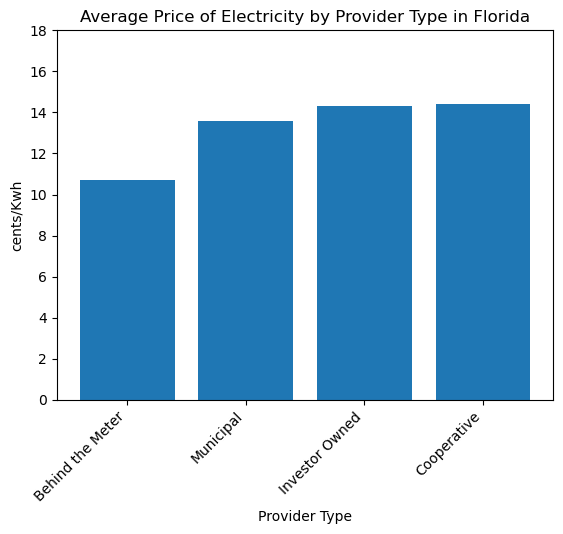

In [34]:
# Plotting graph 3
plt.bar(florida['Ownership'], florida['Average Price (cents/kWh)'])
plt.xticks(rotation=45, ha='right')
plt.title("Average Price of Electricity by Provider Type in Florida")
plt.ylabel("cents/Kwh")
plt.xlabel("Provider Type")
plt.ylim(0,18)
plt.close()

In [41]:
# Prep for graph 4
florida = florida.sort_values(by='Customers (Count)')
florida

,Ownership,Average Price (cents/kWh),Customers (Count)
0,Behind the Meter,10.730000,0.013051
1,Cooperative,14.386667,1.130369
3,Municipal,13.596471,1.323877
2,Investor Owned,14.317500,7.565451


Text(0.5, 0, 'Provider Type')

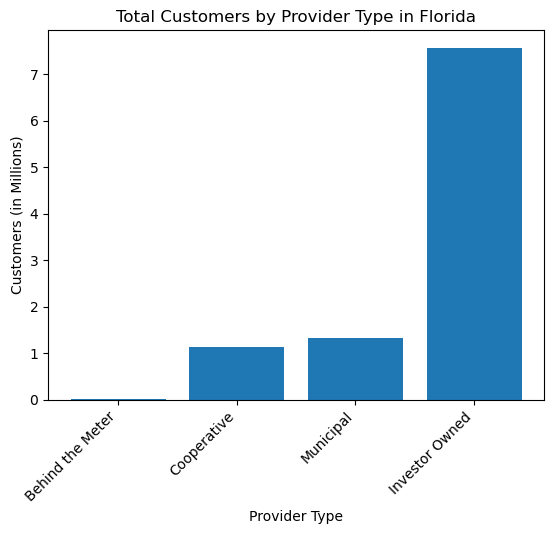

In [42]:
# Plotting graph 4
plt.bar(florida['Ownership'], florida['Customers (Count)'])
plt.xticks(rotation=45, ha='right')
plt.title("Total Customers by Provider Type in Florida")
plt.ylabel("Customers (in Millions)")
plt.xlabel("Provider Type")
plt.close()